# Encoder Model Analysis: Confidence Interval Comparison

This notebook analyzes the confidence intervals for QWK scores across different encoder models (Albertina, BERTimbau, mBERT, etc.) for essay-only context.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the encoder data
df = pd.read_csv('data/ci_wf1_encoder.csv')
SUFFIX = "Weighted F1"

# Display the structure
print("Data shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nModels available:")
print(df['Model'].unique().tolist())
df.head()

Data shape: (5, 13)

Column names:
['Model', 'Guideline', 'Context', 'C1_low', 'C1_up', 'C2_low', 'C2_up', 'C3_low', 'C3_up', 'C4_low', 'C4_up', 'C5_low', 'C5_up']

Models available:
['Albertina', 'BERTimbau Large', 'mBERT', 'BERTuguês', 'BERTimbau Base']


,Model,Guideline,Context,C1_low,C1_up,C2_low,C2_up,C3_low,C3_up,C4_low,C4_up,C5_low,C5_up
0,Albertina,-,essay_only,0.64,0.79,0.09,0.22,0.23,0.39,0.51,0.68,0.11,0.24
1,BERTimbau Large,-,essay_only,0.61,0.77,0.33,0.49,0.18,0.33,0.52,0.68,0.27,0.45
2,mBERT,-,essay_only,0.50,0.68,0.18,0.34,0.24,0.40,0.47,0.63,0.05,0.14
3,BERTuguês,-,essay_only,0.48,0.64,0.12,0.25,0.27,0.43,0.42,0.59,0.19,0.35
4,BERTimbau Base,-,essay_only,0.43,0.60,0.27,0.43,0.19,0.35,0.47,0.64,0.27,0.45


In [3]:
def plot_encoder_comparison(df, competency, suffix):
    """
    Plot confidence intervals comparing all encoder models for a specific competency.
    """
    # Get column names for the specified competency
    low_col = f'{competency}_low'
    up_col = f'{competency}_up'
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define colors for each model
    colors = plt.cm.tab10(np.linspace(0, 1, len(df)))
    
    # Sort dataframe by the midpoint of confidence intervals for better visualization
    df['midpoint'] = (df[low_col] + df[up_col]) / 2
    df_sorted = df.sort_values('midpoint')
    
    # Plot each model
    y_positions = []
    for i, (idx, row) in enumerate(df_sorted.iterrows()):
        model = row['Model']
        low = row[low_col]
        up = row[up_col]
        mid = row['midpoint']
        
        # Plot the confidence interval
        ax.plot([low, up], [i, i], 'o-', color=colors[i], 
                linewidth=3, markersize=8)
        
        # Add the midpoint
        ax.plot(mid, i, 'o', color='black', markersize=6)
        
        # Add text labels
        ax.text(up + 0.02, i, f'[{low:.2f}, {up:.2f}]', 
                verticalalignment='center', fontsize=9)
        
        y_positions.append(i)
    
    # Customize the plot
    ax.set_yticks(y_positions)
    ax.set_yticklabels(df_sorted['Model'])
    ax.set_xlabel(f'{suffix} Score', fontsize=12)
    ax.set_ylabel('Encoder Model', fontsize=12)
    ax.set_title(f'Encoder Model Comparison - {competency}', 
                 fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, axis='x', alpha=0.3)
    
    # Set x-axis limits
    ax.set_xlim(-0.1, 0.8)
    
    # Add reference lines
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
    
    # Check for overlaps
    check_encoder_overlaps(df_sorted, low_col, up_col, ax)
    
    # Clean up temporary column
    df.drop('midpoint', axis=1, inplace=True)
    
    plt.tight_layout()
    plt.show()

In [4]:
def check_encoder_overlaps(df_sorted, low_col, up_col, ax):
    """
    Check for overlaps between encoder model confidence intervals and add annotations.
    """
    models = df_sorted['Model'].tolist()
    intervals = [(row[low_col], row[up_col]) for _, row in df_sorted.iterrows()]
    
    overlaps = []
    for i in range(len(intervals)):
        for j in range(i + 1, len(intervals)):
            # Check if intervals overlap
            if (intervals[i][0] <= intervals[j][1] and intervals[j][0] <= intervals[i][1]):
                overlaps.append((models[i], models[j]))
    
    # Add text annotation about overlaps
    if overlaps:
        # Limit the display to avoid cluttering
        if len(overlaps) > 5:
            overlap_text = f"{len(overlaps)} overlapping pairs found"
        else:
            overlap_text = "Overlaps: " + ", ".join([f"{m1[:8]}-{m2[:8]}" for m1, m2 in overlaps[:5]])
        ax.text(0.02, 0.98, overlap_text, transform=ax.transAxes, 
                verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    else:
        ax.text(0.02, 0.98, "No overlapping intervals", transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

In [5]:
def analyze_all_competencies(df):
    """
    Analyze all competencies for encoder models.
    """
    competencies = ['C1', 'C2', 'C3', 'C4', 'C5']
    
    print(f"\n{'='*60}")
    print(f"Encoder Model Analysis Across All Competencies")
    print(f"{'='*60}\n")
    
    for comp in competencies:
        plot_encoder_comparison(df, comp, SUFFIX)

## Comprehensive Analysis: All Competencies

Let's visualize the confidence intervals for all encoder models across all competencies.


Encoder Model Analysis Across All Competencies



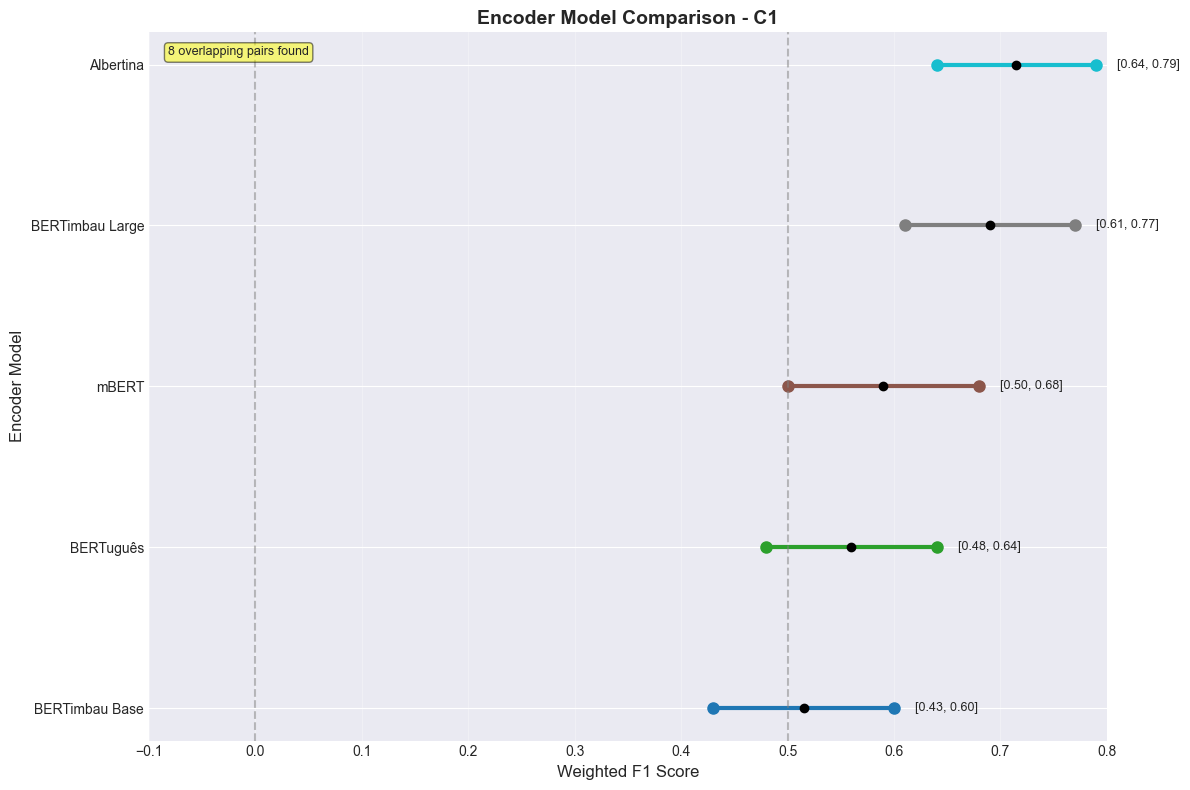

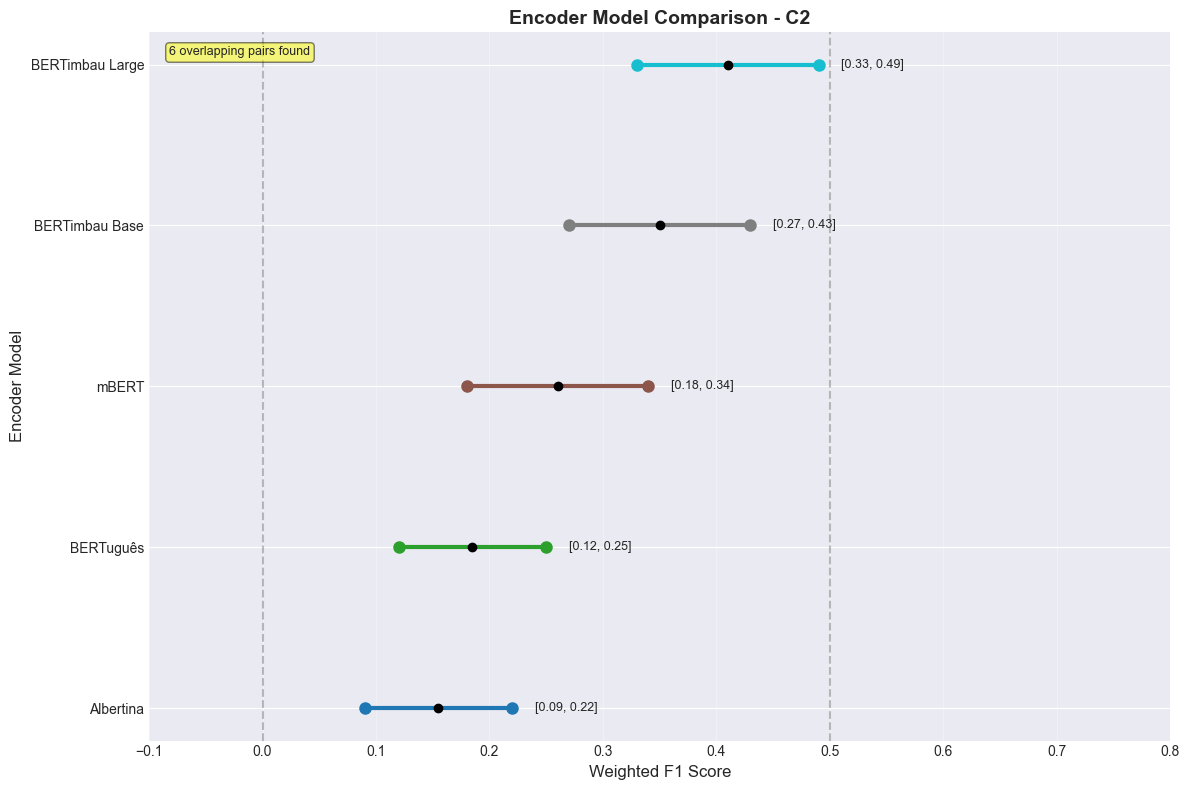

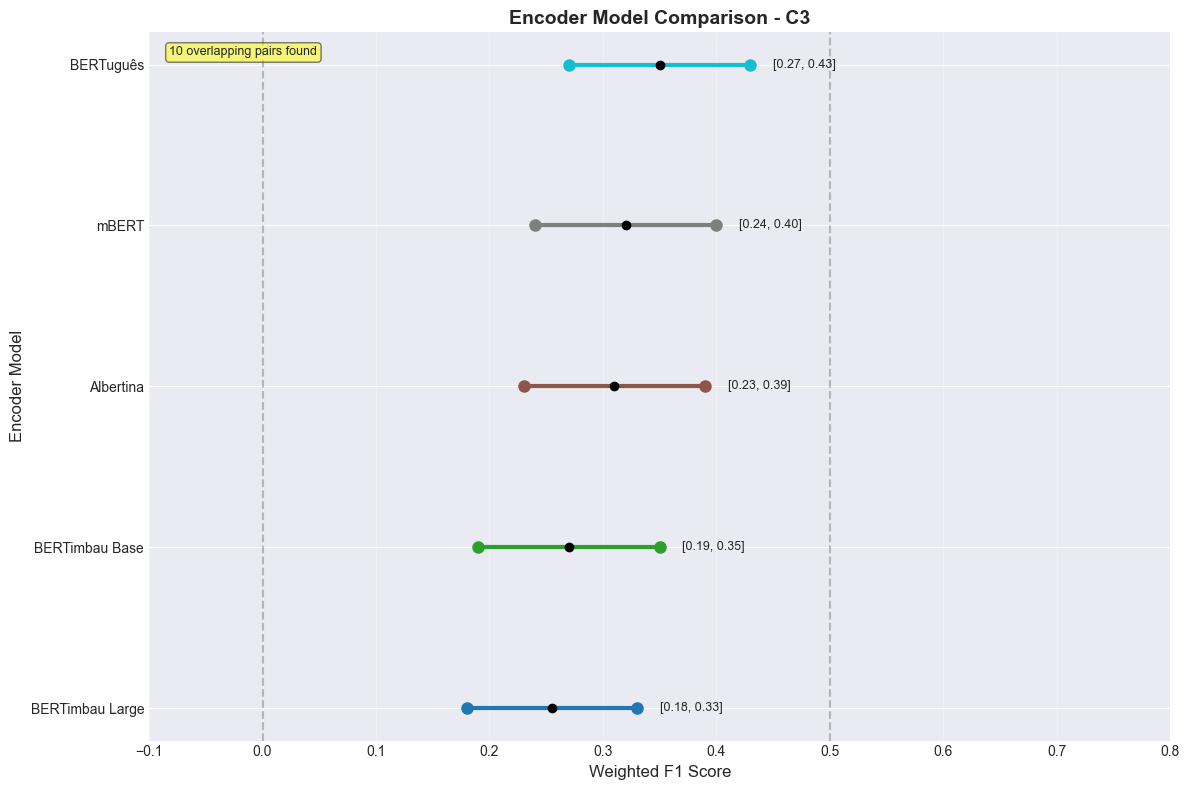

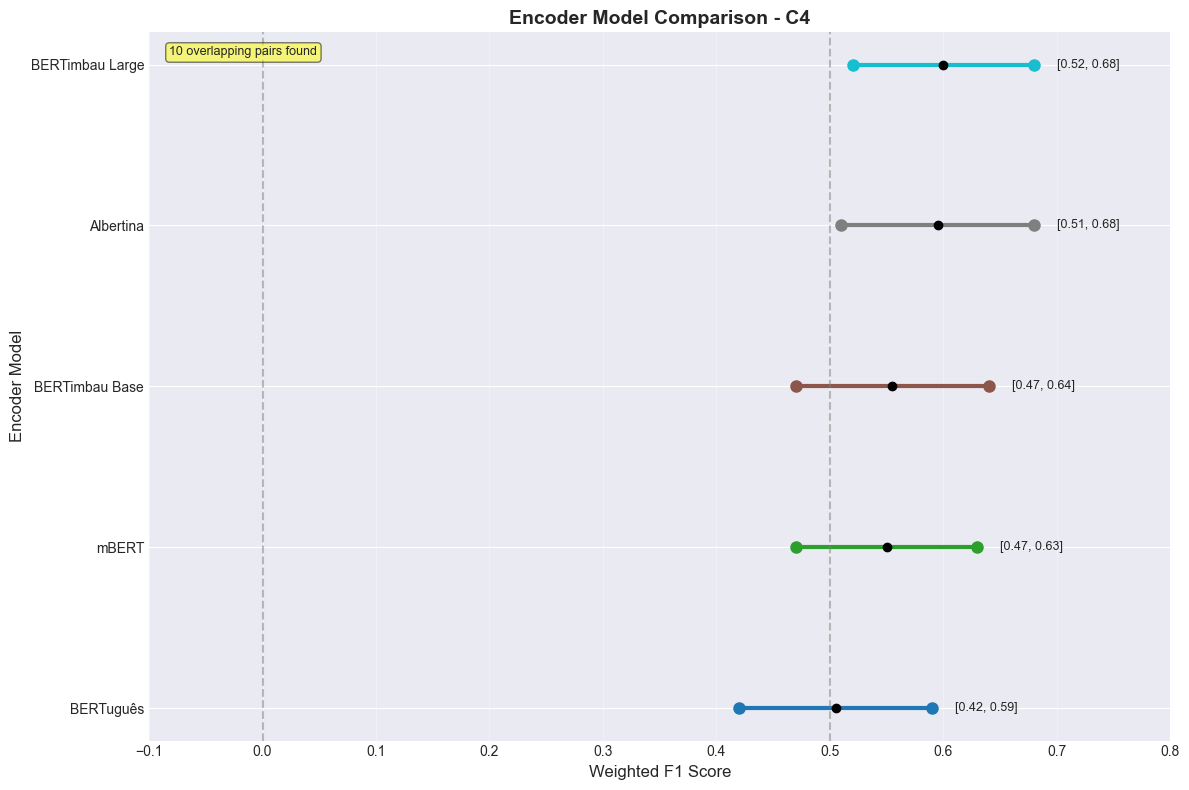

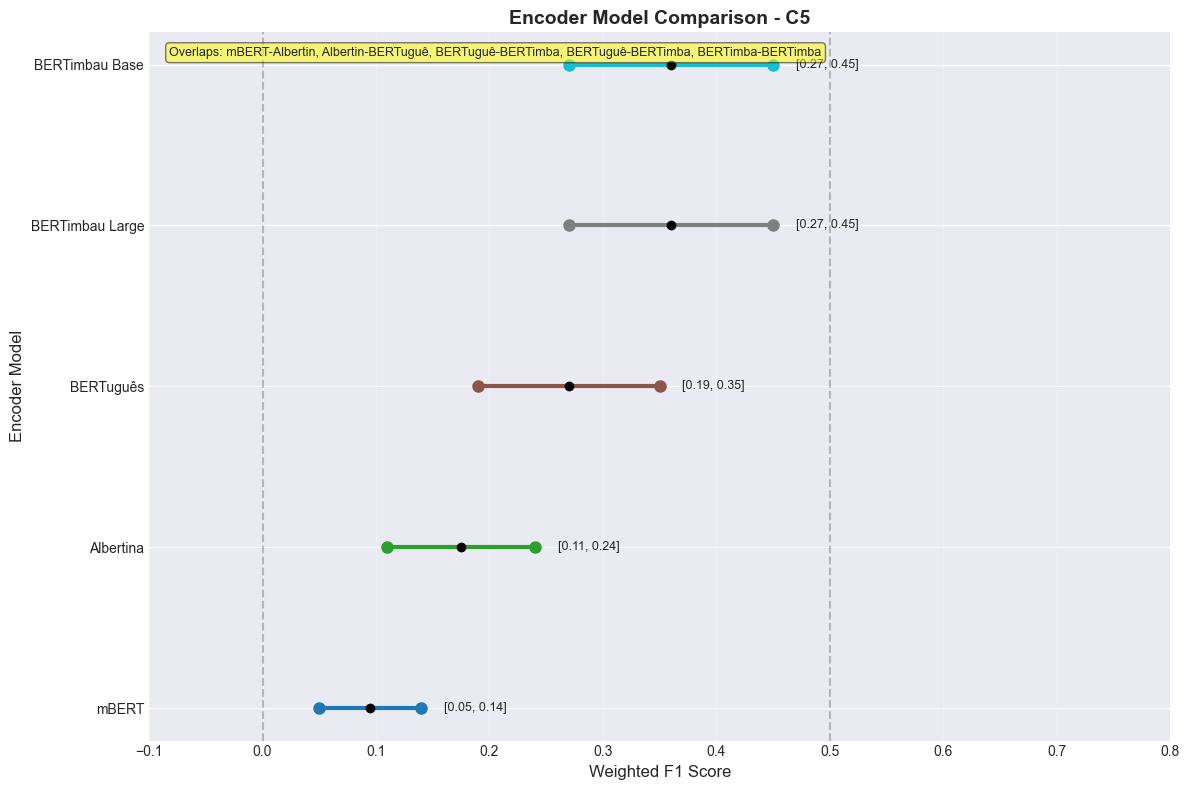

In [6]:
# Analyze all competencies
analyze_all_competencies(df)

## Statistical Summary

Let's create a summary showing the best performing models for each competency and identify statistical significance.

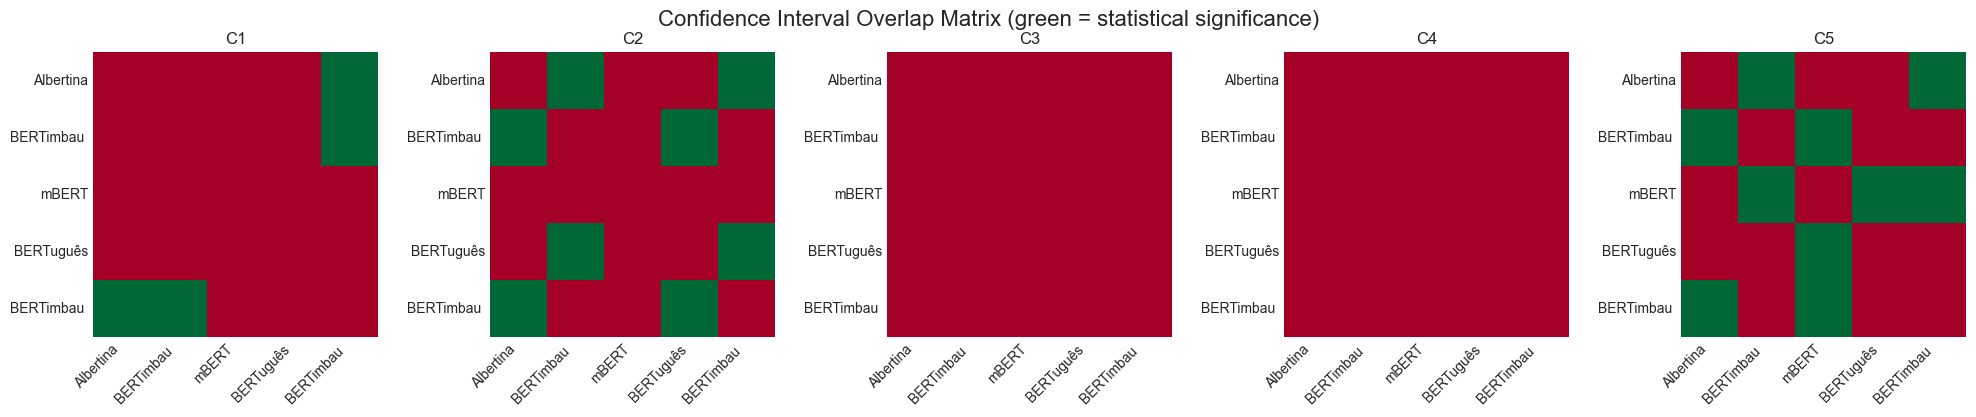

In [7]:
def create_overlap_matrix(df):
    """
    Create a matrix showing which models have overlapping confidence intervals for each competency.
    """
    competencies = ['C1', 'C2', 'C3', 'C4', 'C5']
    models = df['Model'].tolist()
    
    # Create a figure with subplots for each competency
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    for idx, comp in enumerate(competencies):
        low_col = f'{comp}_low'
        up_col = f'{comp}_up'
        
        # Create overlap matrix
        n_models = len(models)
        overlap_matrix = np.zeros((n_models, n_models))
        
        for i in range(n_models):
            for j in range(n_models):
                if i == j:
                    overlap_matrix[i, j] = 1
                else:
                    # Check if intervals overlap
                    if (df.iloc[i][low_col] <= df.iloc[j][up_col] and 
                        df.iloc[j][low_col] <= df.iloc[i][up_col]):
                        overlap_matrix[i, j] = 1
        
        # Plot heatmap
        ax = axes[idx]
        sns.heatmap(overlap_matrix, 
                    xticklabels=[m[:10] for m in models],
                    yticklabels=[m[:10] for m in models],
                    cmap='RdYlGn_r',
                    vmin=0, vmax=1,
                    square=True,
                    cbar=False,
                    ax=ax)
        ax.set_title(f'{comp}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
    plt.suptitle('Confidence Interval Overlap Matrix (green = statistical significance)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Create overlap matrix visualization
create_overlap_matrix(df)

## Individual Competency Analysis

You can analyze specific competencies in detail by running the cell below with your chosen competency.

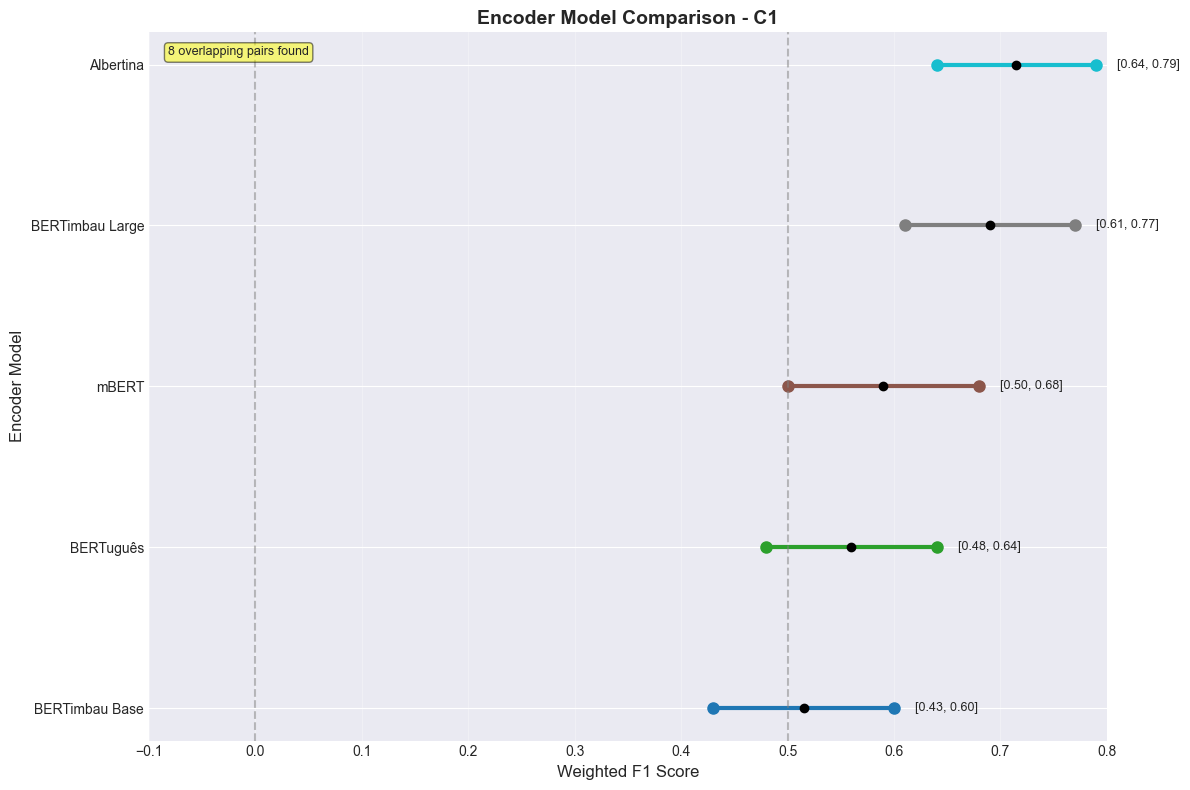

In [9]:
# Analyze a specific competency
competency_to_analyze = 'C1'  # Change this to analyze different competencies (C1-C5)

plot_encoder_comparison(df, competency_to_analyze, SUFFIX)

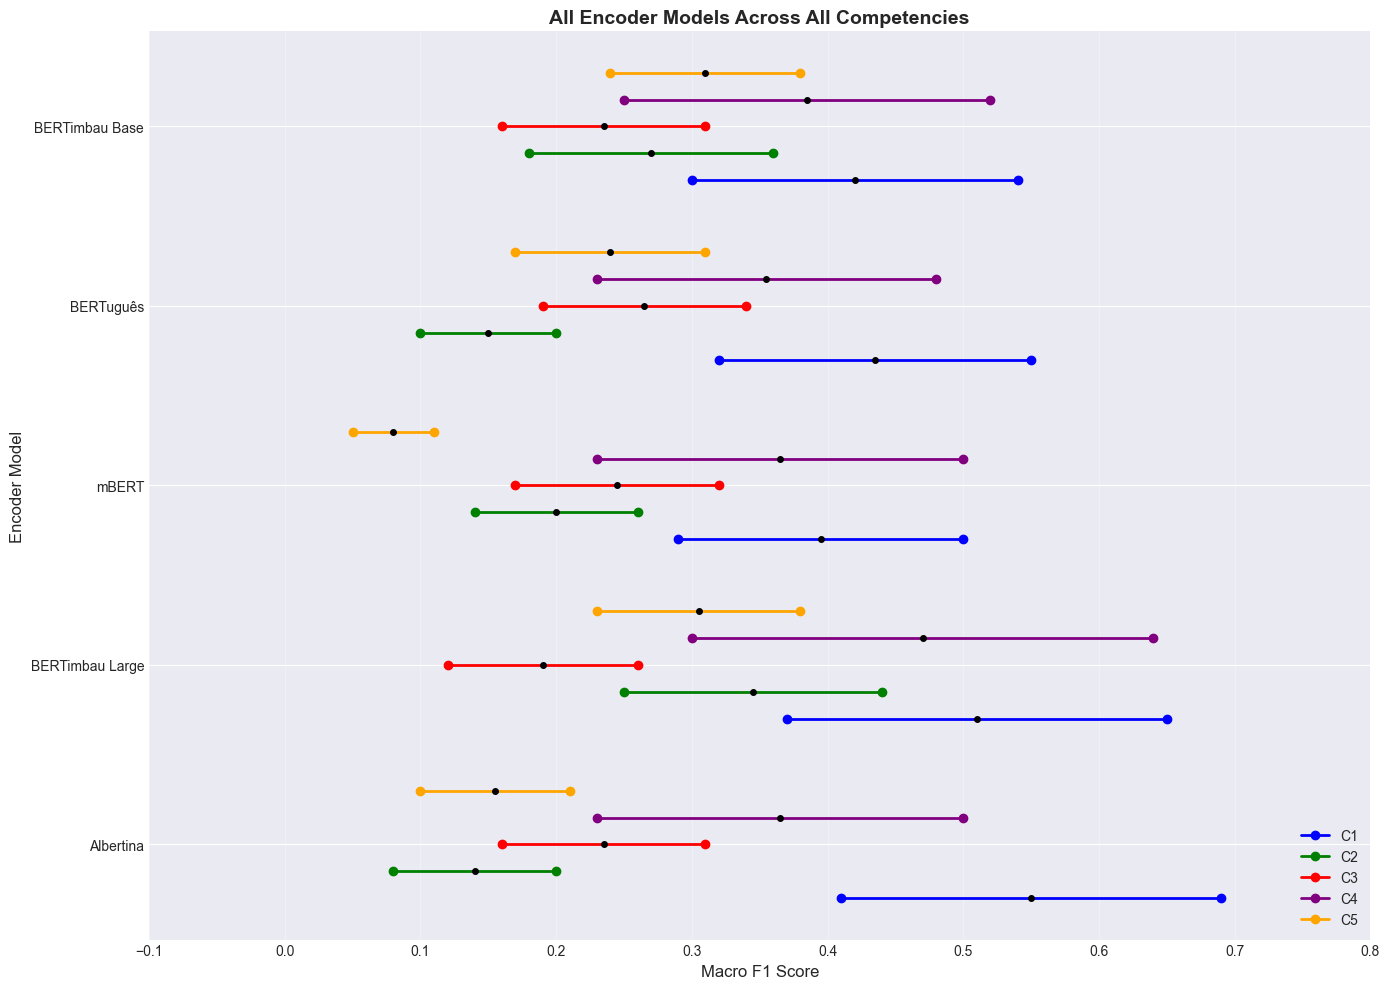

In [ ]:
def plot_all_models_single_chart(df, suffix=''):
    """
    Plot all models and competencies in a single comprehensive chart.
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    
    competencies = ['C1', 'C2', 'C3', 'C4', 'C5']
    models = df['Model'].tolist()
    
    # Set up positions
    y_positions = np.arange(len(models))
    width = 0.15
    
    # Colors for each competency
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    for i, comp in enumerate(competencies):
        low_col = f'{comp}_low'
        up_col = f'{comp}_up'
        
        # Calculate positions for this competency
        positions = y_positions + i * width
        
        # Plot confidence intervals
        for j, (idx, row) in enumerate(df.iterrows()):
            low = row[low_col]
            up = row[up_col]
            mid = (low + up) / 2
            
            # Plot the interval
            ax.plot([low, up], [positions[j], positions[j]], 
                   'o-', color=colors[i], linewidth=2, markersize=6,
                   label=comp if j == 0 else "")
            
            # Add midpoint
            ax.plot(mid, positions[j], 'o', color='black', markersize=4)
    
    # Customize the plot
    ax.set_yticks(y_positions + width * 2)
    ax.set_yticklabels(models)
    ax.set_xlabel(f'{suffix} Score', fontsize=12)
    ax.set_ylabel('Encoder Model', fontsize=12)
    ax.set_title('All Encoder Models Across All Competencies', fontsize=14, fontweight='bold')
    
    # Add legend
    ax.legend(loc='lower right')
    
    # Add grid
    ax.grid(True, axis='x', alpha=0.3)
    
    # Set x-axis limits
    ax.set_xlim(-0.1, 0.8)
    
    plt.tight_layout()
    plt.show()

# Create comprehensive visualization
plot_all_models_single_chart(df, suffix=SUFFIX)